# Practice Python with Fantasy Football

Part 1 (https://www.fantasyfootballdatapros.com/blog/beginner/1)

In [1]:
#2019 WR Catch Rates (Dictionaries)
WRs = [{
    "name": "Michael Thomas",
    "catches": 149,
    "targets": 185
  },
  {
    "name": "Julio Jones",
    "catches": 99,
    "targets": 157
  },
  {
    "name": "Davante Adams",
    "catches": 83,
    "targets": 127
  }]

In [2]:
#Print Results (Loop)
for player in WRs:
  name = player['name']
  catches = player['catches']
  targets = player['targets']
  catch_rate = catches/targets
print(name + ' had a catch rate of ' + str(catch_rate))

Davante Adams had a catch rate of 0.6535433070866141


# Practice Python with Fantasy Football

Part 2 (https://www.fantasyfootballdatapros.com/blog/beginner/2)

In [3]:
#2019 RB Yards
RBs = [{
 'name': 'Aaron Jones',
 'rushing_yds': 1084,
 'rushing_att': 236
}, 
{
 'name': 'Derrick Henry',
 'rushing_yds': 1540,
 'rushing_att': 303
}, 
{
 'name': 'Mark Ingram',
 'rushing_yds': 1018,
 'rushing_att': 202
}]

In [4]:
#Print Results
for player in RBs:
  name = player.get('name', None)
  rushing_yds = player.get('rushing_yds', None)
  rushing_att = player.get('rushing_att', None)
  if name and rushing_yds and rushing_att:
    print(name + ' had a yd per carry average of ' + str(rushing_yds/rushing_att))

Aaron Jones had a yd per carry average of 4.593220338983051
Derrick Henry had a yd per carry average of 5.082508250825082
Mark Ingram had a yd per carry average of 5.03960396039604


# Practice Python with Fantasy Football

Part 3 (https://www.fantasyfootballdatapros.com/blog/beginner/3)

In [5]:
#Import Libraries
import pandas as pd
csv_path = r'/Users/henryrodwell/Desktop/Data Science Projects/NFL2019.csv'

#Load CV into Dataframe
df = pd.read_csv(csv_path) 
df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [6]:
#Access Attributes
print(df.shape)
print('We have', df.shape[0], 'players we can analyze for the 2019 season')
print('We have', df.shape[1], 'columns of data we can analyze for the 2019 season')

(620, 28)
We have 620 players we can analyze for the 2019 season
We have 28 columns of data we can analyze for the 2019 season


In [7]:
#Class Info
df.__class__

pandas.core.frame.DataFrame

In [8]:
#Column Names
df.columns

Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

# Practice Python with Fantasy Football

Part 4 (https://www.fantasyfootballdatapros.com/blog/beginner/4)

In [9]:
df = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'FantasyPoints']]
df['Usage'] = df['Tgt'] + df['RushingAtt']

The first part of our code following .loc[ (df['Pos'] == 'RB') is our "row selector". We are telling pandas that for each row in our DataFrame, only select those rows where the column value "Pos" is equal to "RB".he first part of our code following .loc[ (df['Pos'] == 'RB') is our "row selector". We are telling pandas that for each row in our DataFrame, only select those rows where the column value "Pos" is equal to "RB".

The second part of our .loc is the column selector. We simply pass in a list of column names we'd like included in our final DataFrame. We are just telling pandas, "Here are the columns we'd like included, exclude every column in our original DataFrame that is not in this list". Notice the square brackets. We need to pass in a list.

The second line is a bit less complicated. To set a new column in pandas, you simply use the syntax: 

*df['NewColumnName'] = df['ColumnOne'] + df['ColumnTwo'] - df['ColumnThree']* 

and so on and so on.

In [10]:
df.head()

,Player,Tgt,RushingAtt,FantasyPoints,Usage
0,Christian McCaffrey,142.0,287.0,469.2,429.0
2,Derrick Henry,24.0,303.0,294.6,327.0
3,Aaron Jones,68.0,236.0,314.8,304.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0
5,Dalvin Cook,63.0,250.0,292.4,313.0


# Practice Python with Fantasy Football

Part 5 (https://www.fantasyfootballdatapros.com/blog/beginner/5)

In [11]:
#Rank and Sort
df['UsageRank'] = df['Usage'].rank(ascending=False)

df['FantasyPointsRank'] = df['FantasyPoints'].rank(ascending=False)

df.sort_values(by='UsageRank').head(15)

,Player,Tgt,RushingAtt,FantasyPoints,Usage,UsageRank,FantasyPointsRank
0,Christian McCaffrey,142.0,287.0,469.2,429.0,1.0,1.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0,2.0,3.0
28,Leonard Fournette,100.0,265.0,259.4,365.0,3.0,7.0
8,Nick Chubb,49.0,298.0,255.2,347.0,4.0,8.0
2,Derrick Henry,24.0,303.0,294.6,327.0,5.0,5.0
17,Chris Carson,47.0,278.0,232.6,325.0,6.0,12.0
62,Le'Veon Bell,78.0,245.0,213.0,323.0,7.5,16.0
22,Joe Mixon,45.0,278.0,225.4,323.0,7.5,13.0
5,Dalvin Cook,63.0,250.0,292.4,313.0,9.0,6.0
3,Aaron Jones,68.0,236.0,314.8,304.0,10.0,2.0


In that first line, we are creating a new column based off another column (Usage) and finding each player's Usage rank. This method also takes a keyword argument.

In the case of rank, one such argument it takes is ascending. If we specify that ascending is equal to False, we are telling Pandas that we want to rank the largest numbers in the column we are ranking higher.

We repeat the same process for FantasyPoints. We repeat this process becuase we want to find gaps between Usage and Fantasy Points scored on the season.

Finally, we use another method I talked about called sort_values. This method sorts our DataFrame by a certain column. By default, it sorts the columns by ascending order (smallest to largest). Since we are sorting via the rank column, this is exactly what we want. It takes in a keyword argument of by, so we can tell Pandas which column we'd like to sort on. (It also takes in an argument of ascending, in case you wanted to sort your DataFrame in descending order of a column. In this case, we don't.)

# Practice Python with Fantasy Football

Part 6 (https://www.fantasyfootballdatapros.com/blog/beginner/6)

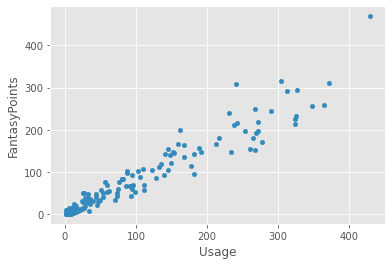

In [12]:
#Visualise Results
from matplotlib import pyplot as plt
plt.style.use('ggplot')
df.plot(x='Usage', y='FantasyPoints', kind='scatter')

In the first line we are telling Python "from matplotlib import the pyplot part, and let us refer to pyplot as plt for the rest of our code."

Inside the pyplot module, there is another submodule known as *style* which is specifically meant to deal with styling visualizations. Inside the style sub-module is a function named *use* which allows us to use a specific style for a visualization. The list of styles that can be used (or list of arguments we can pass to this use function) can be found in the matplotlib docs (for example, another good argument you could use for this function is fivethirtyeight). ggplot here makes our background-color for our visualization grey and our points blue. 

Lastly, that last line is all of the code necessary to draw up our visualization for our data. Pandas DataFrame's have a built-in method called plot which allows us to plot data directly off our DataFrame. Our x and y value is telling Pandas which parts of our df we'd like to plot. In this case, we want to plot Usage and FantasyPoints. Pandas expects that these values are in the form of column names that exist within the df.

## Conclusion

You can see here that as Usage increases, FantasyPoints generally increases as well.

# Practice Python with Fantasy Football

Part 7 (https://www.fantasyfootballdatapros.com/blog/beginner/7)

Evaluating Usage vs Efficiency

With our scatter plot, we were able to see that there is some sort of relationship between the two variables. What we want to do now is use Python to evaluate the strength of the relationship and see if we should rely on it going forward. If the relationship is indeed strong, then we can make what's called a linear regression model to predict Fantasy Points given a player's usage.

Linear regression models are a type of machine learning model used to predict a continuous output based off some sort of linear relationship. 

Machine learning is the practice of building a model to use past data to predict future data. A machine learning model "trains" or "learns" on past data and builds a model. That model can then be used to predict "out-of-sample" inputs and predict some value.

In Machine Learning (talking about supervised machine learning here), there are two types of models - those that deal with continuous outputs (For example, fantasy points, weight, stock price) which are classified as Regression models and those that deal with classification (For example, is an email spam or not spam is a classic classification problem).

For most of our posts, we'll be working with regression models as we're here to predict Fantasy Points, a continuous output, although there are use cases for classification in Fantasy Football analysis. We'll start out with simple linear regression, the classic starting point for any ML beginner. A simple linear regression model works by predicting a continuous output using one input or "feature".

In [13]:
df.head()

,Player,Tgt,RushingAtt,FantasyPoints,Usage,UsageRank,FantasyPointsRank
0,Christian McCaffrey,142.0,287.0,469.2,429.0,1.0,1.0
2,Derrick Henry,24.0,303.0,294.6,327.0,5.0,5.0
3,Aaron Jones,68.0,236.0,314.8,304.0,10.0,2.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0,2.0,3.0
5,Dalvin Cook,63.0,250.0,292.4,313.0,9.0,6.0


What we want to do now is find the correlation coefficient between Usage and FantasyPoints per game that will allow us to objectively tell whether or not we should consider moving forward with a linear regression model.

Two variables that are perfectly negatively correlated have a correlation coefficient of -1. One goes up, the other goes down, always.

Two variables that have a correlation coefficient of 0 have no correlation whatsoever.

With that said, let's import a new module known as numpy and import it as np. Numpy is short for "Numerical Python" and allows to work in arrays, which behave similarly to vectors in linear algebra.

In [14]:
import numpy as np
def covariance(x, y):
    n = len(x)
    return sum((x - np.mean(x)) * (y - np.mean(y))) * 1/(n-1)

Here we define a function that takes in an x and a y and returns the covariance of the two variables.

We use the Python built-in function len to find the length of one of our arrays. (x and y need to be numpy arrays for this to work. Arrays are inherent to Numpy just as DataFrames are inherent to Pandas).

In [15]:
x = df['Usage'].values
y = df['FantasyPoints'].values
x

array([429., 327., 304., 372., 313., 347., 240., 231., 325., 290., 323.,
       272., 365., 269., 242., 268., 264., 238., 272., 159., 323., 277.,
       261., 267., 254., 217., 212., 234., 162., 189., 192., 167., 154.,
       148., 145., 152., 141., 178., 133., 182., 135., 140., 149., 168.,
       145., 182., 128., 103., 110., 106.,  87.,  81.,  76.,  87., 112.,
        75.,  92., 123., 112.,  60.,  95.,  51.,  80.,  53.,  82.,  62.,
        92.,  32.,  26.,  73.,  93.,  86.,  57.,  98.,  96.,  59.,  44.,
        94.,  54.,  27.,  24.,  74.,  28.,  71.,  36.,  44.,  48.,  25.,
        47.,  40.,  33.,  49.,  35.,  45.,  31.,  32.,  13.,  35.,  29.,
        12.,  25.,  16.,  12.,  27.,   6.,  13.,  12.,  12.,  11.,  12.,
         8.,   2.,  11.,  22.,   3.,  13.,  24.,   9.,  17.,   5.,  21.,
        10.,  34.,  10.,  14.,  19.,  16.,  13.,  11.,  12.,   7.,   6.,
         5.,   6.,   5.,   8.,   6.,   8.,   8.,   3.,   4.,   5.,   2.,
         3.,   2.,   1.,   4.,   4.,   5.,   2.,   

By using the values attribute of our DataFrame column, we can get back the numpy array representation of our column. The function we defined above only works with numpy arrays. We set x = usage and y = FantasyPoints just as we did last time when we built the scatter plot.

In [16]:
covariance(x, y)

8788.312301341584

Correlation is actually a function of something else called covariance, which is not super helpful on it's own.

The correlation between two variables is their covariance divided by the product of their standard deviations. We haven't gone over standard deviation, but we will eventually (it's pretty important for analyzing picks in Fantasy Football). So we'll just be using a built-in function from our friend numpy to write a very simple function.

Numpy has a built-in function called std which will calculate the standard deviation of an array for us (It also has a cov function that calculates the covariance between two arrays that I kept from you guys) and so our corr function we write here is pretty simple. We use our function covariance we wrote earlier and then divide it by the product of the two standard deviations of the arrays.

In [17]:
def corr(x, y):
    return covariance(x, y)/(np.std(x) * np.std(y))

corr(x, y)

0.967330979222704

Conclusion

This was a long post, but was necessary as all of this stuff is laying the foundation for building a linear regression model that will allow us to use usage to predict fantasy points. As you can see the correlation between usage and fantasy points is about 0.97 for this sample, which is really high, so we'll move forward with building a linear regression model.

## Test Code

Is there a strong correllation between usage and fantasy points for QBs?

In [18]:
#Create QB Dataframe
qbdf = pd.read_csv(csv_path)
qbdf.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [19]:
#Get QBDF Info
print(qbdf.shape)
qbdf.columns

(620, 28)


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [20]:
#Define QB "Usage" and Define Columns 
qbdf = qbdf.loc[qbdf['Pos'] == 'QB', ['Player', 'PassingAtt', 'RushingAtt', 'FantasyPoints']]
qbdf['Usage'] = qbdf['PassingAtt'] + qbdf['RushingAtt']

In [21]:
qbdf.head()

,Player,PassingAtt,RushingAtt,FantasyPoints,Usage
1,Lamar Jackson,401.0,176.0,415.68,577.0
11,Dak Prescott,596.0,52.0,335.78,648.0
13,Russell Wilson,516.0,75.0,326.60,591.0
16,Deshaun Watson,495.0,82.0,318.98,577.0
29,Jameis Winston,626.0,59.0,297.36,685.0


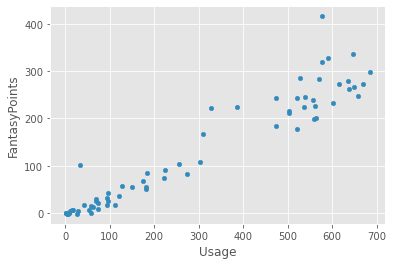

In [22]:
#Visualise Data
plt.style.use('ggplot')

qbdf.plot(x='Usage', y='FantasyPoints', kind='scatter')

In [23]:
def covariance(x, y):
    n = len(x)
    return sum((x - np.mean(x)) * (y - np.mean(y))) * 1/(n-1)

In [24]:
x = qbdf['Usage'].values
y = qbdf['FantasyPoints'].values
x

array([577., 648., 591., 577., 685., 570., 527., 635., 615., 669., 650.,
       639., 659., 522., 540., 475., 556., 603., 562., 537., 387., 329.,
       503., 504., 560., 564., 474., 521., 311., 304., 256., 224., 274.,
       184.,  33., 223., 174., 127., 182., 151., 181.,  96., 121.,  94.,
        70.,  70.,  97.,  73., 112.,  42.,  94.,  58.,  63.,  73.,  53.,
        18.,  16.,  12.,  29.,  59.,   8.,   7.,   9.,   6.,   1.,   3.,
         6.,   1.,   4.,  27.,   6.])

In [25]:
covariance(x, y)

27800.731545271636

In [26]:
def corr(x, y):
    return covariance(x, y)/(np.std(x) * np.std(y))

corr(x, y)

0.9717358607824712

## Conclusion

As with RBs the correlation between QB usage and fantasy points is about 0.97, which is again really high, so we would move forward with building a linear regression model.

# Practice Python with Fantasy Football

Part 8 (https://www.fantasyfootballdatapros.com/blog/beginner/8)

The Basics of Machine Learning

Linear Regression is a machine learning algorithm.

Machine Learning algorithms are classified in to two categories - those that "train" or learn with data that is labeled, and those that don't. The former is known as supervised machine learning, and the latter is known as unsupervised machine learning.

For the purpose of this series, we are going to focus on supervised machine learning for now. Supervised machine learning algorithms can be categorized further - in to regression algorithms and classification algorithms. Regression algorithms, what we'll be focusing on right now, are used to predict a continuous output - outputs that can span an interval. Weight, stock prices, and Fantasy Football points are all continuous outputs and thus can be predicted using Regression algorithms.

The first thing we need to do before using SLR to predict Fantasy Points is train the algorithm. Basically, we split our data in to training data and testing data. We'll use a function to do this in the code. We then take the training data and feed it to the algorithm. Once the function is trained, we'll then give it testing data. It will take the testing data and use it to predict Fantasy Football points. From there, we then evaluate how the predicted values faired with actual values and calculate something called root mean squared error - which tells us how our model did. This will be reserved for future parts of this series.

In [27]:
#View RB Rankings
df.sort_values(by='UsageRank').head()

,Player,Tgt,RushingAtt,FantasyPoints,Usage,UsageRank,FantasyPointsRank
0,Christian McCaffrey,142.0,287.0,469.2,429.0,1.0,1.0
4,Ezekiel Elliott,71.0,301.0,311.7,372.0,2.0,3.0
28,Leonard Fournette,100.0,265.0,259.4,365.0,3.0,7.0
8,Nick Chubb,49.0,298.0,255.2,347.0,4.0,8.0
2,Derrick Henry,24.0,303.0,294.6,327.0,5.0,5.0


What we want to do is use Usage to predict FantasyPoints. What we need to do first, though, is to separate the training and testing data we are going to be using to train the algorithm and test it. This is very important. It's not good to test the model on the same data you used to train it. This is because you want to test the model on data it has not seen before, to do otherwise would be known as a "data-leakage" issue.

In [28]:
#Import Function to Split Data and Set Variables (x,y)
from sklearn.model_selection import train_test_split
X = df['Usage'].values
Y = df['FantasyPoints'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Usage is our X as it's our independent or explanatory variable. It is being used here to explain Fantasy Football performance.

Y is set to be our FantasyPoints column as it's what's being explained or predicted by our model.

By default, train_test_split needs a numpy array as arguments to it's function. The way we do this in Pandas is by tacking on .values at the end there. Pandas then takes our DataFrame column (or Series) and converts it to a numpy array.

From there, we input it in to our little function, and we also set test_size=0.2. We are telling sklearn here that we'd like to save 20% of our data for testing. The remaining 80% will be used to train the algorithm.

In [29]:
x_train[:20]

array([  4.,  54.,  60.,  25.,  59.,  33.,  13.,  34.,  71., 133., 240.,
       272.,  12.,   8.,  47.,   2.,  35.,   8., 231.,  11.])

In [31]:
y_test[:20]

array([ 14.1,  51.8,  94.9,  60.2,   4.1,   5.7, 114.5,  23.5, 142.2,
         1.8, 213. ,   3.7,  18.1, 191.6,  20. , 145.5,   0.9, 259.4,
        66.2, 232.6])

I just outputed our x_train and y_test values to make sure everything looked good. I used list indexing notation to output the first 20 values of each array - ([:20] means grab everything up to the 20th item in the array/list).